<div style="border:solid Chocolate 2px; padding: 40px">

<b> Тимур, привет!👋</b>  

Меня зовут Кирилл Васильев, я буду ревьюером твоего проекта. Я предлагаю общаться на «ты», но если привычнее на «вы», просто скажи об этом!
    
**Заранее прошу прощения за долгую проверку. Многие решили сдать проекты одновременно.**


Я буду оставлять комментарии в твоем проекте. Пожалуйста, не удаляй их, они могут быть полезны в случае повторной проверки.

Ты можешь реагировать на комментарии как просто написав их в Markdown-ячейках, так и выделив их цветом. Например, <font color='blue'>синим</font>. Второй способ, на мой взгляд, удобнее.

Свои комментарии я буду обозначать <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:
  
<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным. Здесь же я могу давать советы и предложения.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>

<br/>
<div class="alert alert-info">
Рекомендую для твоих комментариев использовать синий или любой другой цветной фон. Я постараюсь ничего не пропустить, но если комментарии будут выделены, то это мне очень поможет!
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой руководитель будет поступать также. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
from tqdm.notebook import trange

In [ ]:
data_bank = pd.read_csv('/datasets/Churn.csv')

**A. Знакомство с данными**

In [ ]:
data_bank.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [ ]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
data_bank.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [ ]:
data_bank.describe(include='all').T.drop(
    index=['RowNumber', 'CustomerId'], columns='count'
).style.background_gradient(subset=["mean", "50%"],
                            vmin=0,
                            vmax=700,
                            cmap="YlGnBu")

,unique,top,freq,mean,std,min,25%,50%,75%,max
Surname,2932,Smith,32,nan,nan,nan,nan,nan,nan,nan
CreditScore,nan,nan,nan,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Geography,3,France,5014,nan,nan,nan,nan,nan,nan,nan
Gender,2,Male,5457,nan,nan,nan,nan,nan,nan,nan
Age,nan,nan,nan,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,nan,nan,nan,4.997690,2.894723,0.000000,2.000000,5.000000,7.000000,10.000000
Balance,nan,nan,nan,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,nan,nan,nan,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,nan,nan,nan,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,nan,nan,nan,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000


In [ ]:
data_bank.drop(columns=[
    'RowNumber', 'CustomerId'
    ]).corr()['Exited']

CreditScore       -0.027094
Age                0.285323
Tenure            -0.016761
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64

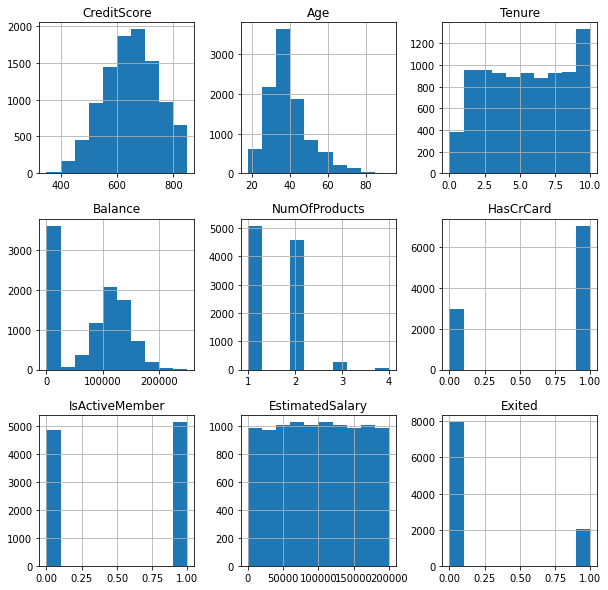

In [ ]:
data_bank.drop(columns=['RowNumber', 'CustomerId']).hist(figsize=(10, 10))

plt.show()

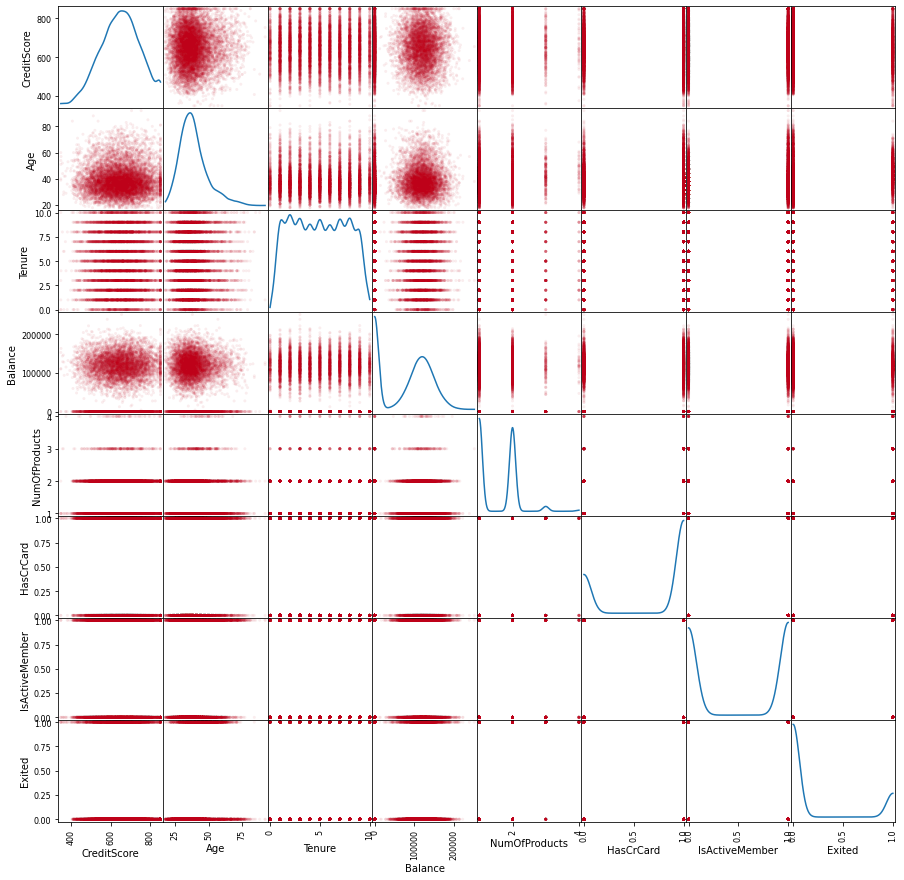

In [ ]:
pd.plotting.scatter_matrix(data_bank.drop(columns=['RowNumber', 'CustomerId', 'EstimatedSalary']),
                           figsize=(15, 15),
                           diagonal='kde',
                           color='xkcd:scarlet',
                           alpha=0.07)
plt.show()

**_Вывод:_**
1. Признак `Tenure` имеет пропуски, **заполню их**.
2. Признаки `RowNumber`,`CustomerId`,`Surname` **удалю**,так как они совершенно не информативны и только замедлят обучение.
3. Признаки `Geography`,`Gender` категориальные, а логистическая регрессия работает только с количественными, исправим это примерив **прямое кодирование (или OHE)**.
4. Признаки `CreditScore`, `Age`, `Tenure`, `Balance` имеют разный масштаб, применим **стандартизация данных**.
5. Целевой признак `Exited` не сбалансирован, это видно по средней (да и на гистограмме), совершили уход только 20,3700% объектов, этот дисбаланс надо исправить. **Применю upsampling или downsampling**, что выбрать выберу эмпирически, что покажет наилучший результат.

**Б. Заполню пропуски в `Tenure` и удалим столбцы `RowNumber`,`CustomerId`,`Surname`**

Посмотрим, можно ли востановить пропуски по другим ячейкам

In [ ]:
data_bank.query('Tenure.isna()').head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,83,15641732,Mills,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
85,86,15805254,Ndukaku,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
94,95,15676966,Capon,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
99,100,15633059,Fanucci,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
111,112,15665790,Rowntree,538,Germany,Male,39,NaN,108055.10,2,1,0,27231.26,0


In [ ]:
data_bank.query('Tenure.isna()').describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,909.000000,9.090000e+02,909.000000,909.000000,0.0,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,4866.386139,1.568981e+07,648.451045,38.647965,NaN,76117.341474,1.530253,0.710671,0.510451,99180.389373,0.201320
std,2909.604343,7.511225e+04,99.079381,9.785438,NaN,63105.690715,0.588452,0.453701,0.500166,56378.063765,0.401207
min,31.000000,1.556581e+07,359.000000,18.000000,NaN,0.000000,1.000000,0.000000,0.000000,106.670000,0.000000
25%,2311.000000,1.562658e+07,580.000000,32.000000,NaN,0.000000,1.000000,0.000000,0.000000,49872.330000,0.000000
50%,4887.000000,1.568687e+07,647.000000,37.000000,NaN,96674.550000,1.000000,1.000000,1.000000,99444.020000,0.000000
75%,7306.000000,1.575680e+07,718.000000,43.000000,NaN,128554.980000,2.000000,1.000000,1.000000,145759.700000,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,NaN,206663.750000,4.000000,1.000000,1.000000,199390.450000,1.000000


In [ ]:
data_bank.query('Tenure == 0').describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,382.000000,3.820000e+02,382.000000,382.000000,382.0,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,5089.172775,1.569618e+07,651.913613,39.306283,0.0,80135.307277,1.437173,0.651832,0.531414,99565.395157,0.235602
std,2821.087244,7.187497e+04,95.741781,10.418181,0.0,62233.212461,0.522442,0.477014,0.499667,57360.554103,0.424931
min,30.000000,1.556647e+07,350.000000,19.000000,0.0,0.000000,1.000000,0.000000,0.000000,332.810000,0.000000
25%,2626.750000,1.563546e+07,592.250000,32.000000,0.0,0.000000,1.000000,0.000000,0.000000,47574.687500,0.000000
50%,5107.500000,1.569641e+07,653.000000,38.000000,0.0,101050.445000,1.000000,1.000000,1.000000,102160.510000,0.000000
75%,7503.500000,1.575880e+07,714.750000,44.750000,0.0,129638.762500,2.000000,1.000000,1.000000,149577.825000,0.000000
max,9920.000000,1.581553e+07,850.000000,79.000000,0.0,197041.800000,3.000000,1.000000,1.000000,199478.050000,1.000000


In [ ]:
data_bank.query('Tenure.isna()').value_counts(['Gender'])

Gender
Male      483
Female    426
dtype: int64

In [ ]:
data_bank.query('Tenure == 0').value_counts(['Gender'])

Gender
Male      196
Female    186
dtype: int64

Была идея что там должны быть нули, но такого чтобы они были сильно похожи по другим ячейкам или нормализовали (делали распределение ближе к нормальному) друг друга нет... Они скорее всего совершенно случайные. **Заполню их медианой**.

In [ ]:
data_bank['Tenure'] = data_bank['Tenure'].transform(lambda x: x.fillna(x.median()))

In [ ]:
data_bank['Tenure'].isna().sum()

0

Удаляем неинформативные столбцы

In [ ]:
columns_drop = [
    'RowNumber',
    'CustomerId',
    'Surname'
]
data_bank.drop(columns=columns_drop, inplace=True)

data_bank.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

**В. Преобразование (OHE)**

In [ ]:
data_bank = pd.get_dummies(data_bank, drop_first=True)

data_bank.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0


**Г. Разделю на выборки и удаляю неинформативные столбцы**

Сделаю это до балансировки (upsampling или downsampling), масштабирования классов (стандартизация данных) так как в реальных условиях чаще всего доступа к тестовой выборке у нас не будет (преблизим условия к более реальным)

In [ ]:
# Объявляем классы
features = data_bank.drop(columns='Exited')
target = data_bank['Exited']

# Создаем обучающую, валидационную и тестовую выборки 3:1:1
features_train, features_valid, \
    target_train, target_valid = train_test_split(features,
                                                     target,
                                                     test_size=0.4,
                                                     random_state=12345,
                                                     stratify=target)
features_valid, features_test, \
    target_valid, target_test = train_test_split(features_valid,
                                                     target_valid,
                                                     test_size=0.5,
                                                     random_state=12345,
                                                     stratify=target_valid)

In [ ]:
display(features_train.shape, target_train.shape,
        features_valid.shape, target_valid.shape,
        features_test.shape, target_test.shape)

(6000, 11)

(6000,)

(2000, 11)

(2000,)

(2000, 11)

(2000,)

**Г. Стандартизация данных**

In [ ]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

pd.options.mode.chained_assignment = None
display(features_train[numeric].head(1),
        features_valid[numeric].head(1),
        features_test[numeric].head(1))

/tmp/ipykernel_100/2110816848.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,CreditScore,Age,Tenure,Balance
2837,-1.040434,0.953312,0.3606,0.774657


,CreditScore,Age,Tenure,Balance
6612,-1.524838,2.38316,-0.729557,1.011655


,CreditScore,Age,Tenure,Balance
657,-0.504497,1.429928,-1.456328,0.873883


**Д. Балансировка классов (upsampling или downsampling)**

In [ ]:
def upsampling(features, target, only_target_class=False):
    try:
        #Разделяем выборку на отрицательные и положительные объекты
        features_zero = features[target == 0]
        features_ones = features[target == 1]
        target_zero = target[target == 0]
        target_ones = target[target == 1]
        #Найдем во сколько раз надо увеличить
        #Функция всегда будет подбирать соотношение 1:1
        if len(features_zero) > len(features_ones):
            rat = len(features_zero) / len(features_ones)
            #Увеличиваем,совмещаем и перемешиваем
            features_upsampling = pd.concat([features_zero] + ([features_ones] * math.ceil(rat)))
            target_upsampling = pd.concat([target_zero] + ([target_ones] * math.ceil(rat)))
            features_upsampling, target_upsampling = shuffle(features_upsampling,
                                                             target_upsampling,
                                                             random_state=12345)

            return features_upsampling, target_upsampling
        elif len(features_ones) > len(features_zero) and only_target_class != True:
            rat = len(features_ones) / len(features_zero)
            #Увеличиваем,совмещаем и перемешиваем
            features_upsampling = pd.concat([features_ones] + [features_zero] * math.ceil(rat))
            target_upsampling = pd.concat([target_ones] + [target_zero] * math.ceil(rat))
            features_upsampling, target_upsampling = shuffle(features_upsampling,
                                                             target_upsampling,
                                                             random_state=12345)

            return features_upsampling, target_upsampling
        else:

            return print(f'Количество features_zero: {len(features_zero)} \
                         Количество features_ones: {len(features_ones)}')
    except:
        pass

In [ ]:
features_upsampling, target_upsampling = upsampling(features_train, target_train)

display(features_upsampling.shape, target_upsampling.shape)
display(len(target_upsampling.loc[target_upsampling == 0]), \
        len(target_upsampling.loc[target_upsampling == 1]))

(9666, 11)

(9666,)

4778

4888

In [ ]:
target_upsampling.mean()

0.5056900475894889

In [ ]:
def downsampling(features, target, only_target_class=False):
    try:
        #Разделяем выборку на отрицательные и положительные объекты
        features_zero = features[target == 0]
        features_ones = features[target == 1]
        target_zero = target[target == 0]
        target_ones = target[target == 1]
        #Найдем во сколько раз надо уменьшить
        #Нам известно что TN в выборке 80% но давайте сделаем код более универсальным
        if len(features_zero) > len(features_ones):
            rat = len(features_ones) / len(features_zero)
            #Уменьшаем,совмещаем и перемешиваем
            features_downsampling = pd.concat(
                [features_zero.sample(frac=rat, random_state=12345)] + [features_ones]
            )
            target_downsampling = pd.concat(
                [target_zero.sample(frac=rat, random_state=12345)] + [target_ones]
            )
            features_downsampling, target_downsampling = shuffle(features_downsampling,
                                                             target_downsampling,
                                                             random_state=12345)

            return features_downsampling, target_downsampling
        elif len(features_ones) > len(features_zero) and only_target_class != True:
            rat = len(features_zero) / len(features_ones)
            #Уменьшаем,совмещаем и перемешиваем
            features_downsampling = pd.concat(
                [features_ones.sample(frac=rat, random_state=12345)] + [features_zero]
            )
            target_downsampling = pd.concat(
                [target_ones.sample(frac=rat, random_state=12345)] + [target_zero]
            )
            features_downsampling, target_downsampling = shuffle(features_downsampling,
                                                             target_downsampling,
                                                             random_state=12345)

            return features_downsampling, target_downsampling
        else:

            return print(f'Количество features_zero: {len(features_zero)} \
                         Количество features_ones: {len(features_ones)}')
    except:
        pass

In [ ]:
features_downsampling, target_downsampling = downsampling(features_train, target_train)

display(features_downsampling.shape, target_downsampling.shape)
display(len(target_downsampling.loc[target_downsampling == 0]), \
        len(target_downsampling.loc[target_downsampling == 1]))

(2444, 11)

(2444,)

1222

1222

## Исследование задачи

**Поиск лучших гиперпараметров**

In [ ]:
def search_favorite_model(features_train, target_train,
                          features_valid, target_valid,
                          calculate_accuracy=False):
    try:
        result_accuracy = 0
        result_f1 = 0
        favorite_model_accuracy = 0
        favorite_model_f1 = 0
        model_linear = LogisticRegression(random_state=12345)
        # Перебераем количество оценивающих
        for est in trange(10, 50, 10, desc=f'Total'):
            # Перебераем глубину
            for depth in trange(1, 11, desc=f'inner loop {est}'):
                model_tree = DecisionTreeClassifier(random_state=12345,
                                                    max_depth=depth)
                model_ensemble = RandomForestClassifier(random_state=12345,
                                                        n_estimators=est,
                                                        max_depth=depth)
                #Обучаем модель и сохраняем наиболее эффективные гиперпараметры
                for model in model_tree, model_ensemble, model_linear:
                    model.fit(features_train, target_train)
                    pridictions_valid = model.predict(features_valid)
                    #Вычисляем f1_score
                    f1 = f1_score(target_valid, pridictions_valid)
                    if result_f1 < f1:
                        result_f1 = f1
                        favorite_model_f1 = model
                    #Вычисляем accuracy
                    #Только если calculate_accuracy=True
                    if calculate_accuracy == True:
                        accuracy = accuracy_score(target_valid, pridictions_valid)
                        if result_accuracy < accuracy:
                            result_accuracy = accuracy
                            favorite_model_accuracy = model
        accuracy_return = f'Наилучшее accuracy у модели: {favorite_model_accuracy} \
                                accuracy = {result_accuracy}'
        f1_return = f'Наилучшее f1_score у модели: {favorite_model_f1} \
                          f1_score = {result_f1}'
        if calculate_accuracy == False:

            return f1_return
        else:

            return accuracy_return, f1_return
    except:
        pass

In [ ]:
search_favorite_model(features_train, target_train,
                      features_valid, target_valid)

Total:   0%|          | 0/4 [00:00<?, ?it/s]

inner loop 10:   0%|          | 0/10 [00:00<?, ?it/s]

inner loop 20:   0%|          | 0/10 [00:00<?, ?it/s]

inner loop 30:   0%|          | 0/10 [00:00<?, ?it/s]

inner loop 40:   0%|          | 0/10 [00:00<?, ?it/s]

'Наилучшее f1_score у модели: RandomForestClassifier(max_depth=10, n_estimators=20, random_state=12345)                           f1_score = 0.6036585365853658'

**Вывод:**

Лучшая модель _**случайный лес**_ с глубиной 10 и числом проверяющих 20, ее F1 = 0.6036585365853658

## Борьба с дисбалансом

**А. Поэкспериментируем с увеличением выборки**

Найдем наилучшие гиперпараметры

In [ ]:
search_favorite_model(features_upsampling, target_upsampling,
                      features_valid, target_valid,
                      calculate_accuracy=True)

Total:   0%|          | 0/4 [00:00<?, ?it/s]

inner loop 10:   0%|          | 0/10 [00:00<?, ?it/s]

inner loop 20:   0%|          | 0/10 [00:00<?, ?it/s]

inner loop 30:   0%|          | 0/10 [00:00<?, ?it/s]

inner loop 40:   0%|          | 0/10 [00:00<?, ?it/s]

('Наилучшее accuracy у модели: RandomForestClassifier(max_depth=10, n_estimators=40, random_state=12345)                                 accuracy = 0.838',
 'Наилучшее f1_score у модели: RandomForestClassifier(max_depth=10, n_estimators=30, random_state=12345)                           f1_score = 0.6511134676564156')

Лучшая модель _**случайный лес**_ с глубиной 10 и числом проверяющих 30, ее F1 = 0.6511134676564156

In [ ]:
model_upsampling = RandomForestClassifier(random_state=12345,
                                          n_estimators=1,
                                          max_depth=10)
model_upsampling.fit(features_upsampling, target_upsampling)

predictions_valid = model_upsampling.predict(features_valid)
accuracy = accuracy_score(target_valid, predictions_valid)
f1 = f1_score(target_valid, predictions_valid)

display(f'accuracy = {accuracy}, f1 = {f1}')

'accuracy = 0.8355, f1 = 0.6511134676564156'

**Б. Поэкспериментируем с уменьшением выборки**

Найдем наилучшие гиперпараметры

In [ ]:
search_favorite_model(features_downsampling, target_downsampling,
                      features_valid, target_valid,
                      calculate_accuracy=True)

Total:   0%|          | 0/4 [00:00<?, ?it/s]

inner loop 10:   0%|          | 0/10 [00:00<?, ?it/s]

inner loop 20:   0%|          | 0/10 [00:00<?, ?it/s]

inner loop 30:   0%|          | 0/10 [00:00<?, ?it/s]

inner loop 40:   0%|          | 0/10 [00:00<?, ?it/s]

('Наилучшее accuracy у модели: RandomForestClassifier(max_depth=4, n_estimators=10, random_state=12345)                                 accuracy = 0.8075',
 'Наилучшее f1_score у модели: RandomForestClassifier(max_depth=8, n_estimators=40, random_state=12345)                           f1_score = 0.6304761904761904')

Лучшая модель _**случайный лес**_ с глубиной 8 и числом проверяющих 40, ее F1 = 0.6304761904761904

In [ ]:
model_downsampling = RandomForestClassifier(random_state=12345,
                                            n_estimators=8,
                                            max_depth=40)
model_downsampling.fit(features_downsampling, target_downsampling)

predictions_valid = model_downsampling.predict(features_valid)
accuracy = accuracy_score(target_valid, predictions_valid)
f1 = f1_score(target_valid, predictions_valid)

display(f'accuracy = {accuracy}, f1 = {f1}')

'accuracy = 0.7905, f1 = 0.5728848114169215'

**Вывод:**

1. Downsampling значительно понизил качество нашей модели и f1 меру
2. Upsampling повысил f1-меру на почти 5%, так же повысив незначительно качество нашей модели, но в данном случае нам важна именно f1-мера. Upsampling будет использован.

Лучшая модель _**случайный лес**_ с глубиной 10 и числом проверяющих 30, ее F1 = 0.6511134676564156

## Тестирование модели

**Переходим к применению нашей модели**

Для начала попробовал объединить вариационную и обучающую выборки чтобы посмотреть улучшиться ли результат (больше данных как ни как), но результат получился хуже **'accuracy = 0.8135, f1 = 0.5950054288816504'**, закомментировал.

**По результатам проверки мы будем использовать:**

модель _**RF**_ с глубиной 10 и числом проверяющих 30, на данных с приминением upsampling


In [ ]:
##Объединим валидационную и обучающую выборки
#features_train = pd.concat([features_train, features_valid])
#target_train = pd.concat([target_train, target_valid])

##Применим upsampling
#features_upsampling, target_upsampling = upsampling(features_train, target_train)

In [ ]:
#display(features_upsampling.shape, target_upsampling.shape)
#display(len(target_upsampling.loc[target_upsampling == 0]), \
        #len(target_upsampling.loc[target_upsampling == 1]))

In [ ]:
##Обучаем модель
#model = RandomForestClassifier(max_depth=10, n_estimators=20,
                               #random_state=12345)
#model.fit(features_upsampling, target_upsampling)

##Применяем преобразование, масштабирование к тестовой
##Выборке
#features_test = pd.get_dummies(features_test, drop_first=True)
#features_test[numeric] = scaler.transform(features_test[numeric])

#predictions_test = model.predict(features_test)
#accuracy = accuracy_score(target_test, predictions_test)
#f1 = f1_score(target_test, predictions_test)

#display(f'accuracy = {accuracy}, f1 = {f1}')

Обучаем модель

In [ ]:
#Обучаем модель
model = RandomForestClassifier(max_depth=10, n_estimators=30,
                               random_state=12345)
model.fit(features_upsampling, target_upsampling)

predictions_test = model.predict(features_test)
accuracy = accuracy_score(target_test, predictions_test)
f1 = f1_score(target_test, predictions_test)

display(f'accuracy = {accuracy}, f1 = {f1}')

'accuracy = 0.817, f1 = 0.6013071895424837'

Построим ROC кривую

In [ ]:
probabilites_test = model.predict_proba(features_test)
probabilites_one_test = probabilites_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilites_one_test)
test_roc = roc_auc_score(target_test, probabilites_one_test)

test_roc

0.8490215947843067

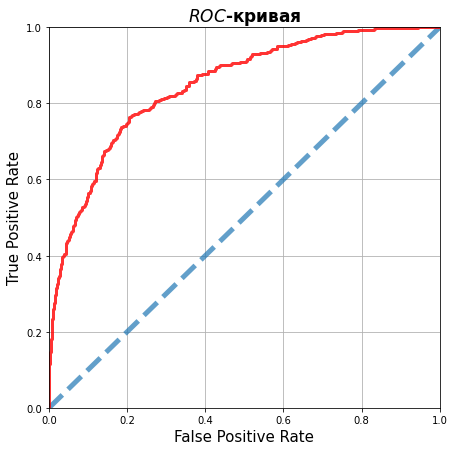

In [ ]:
plt.figure(figsize=(7, 7))

plt.plot([0, 1], [0, 1], '--', alpha=0.7, lw=5, mew=2, ms=10)
plt.plot(fpr, tpr, '-', color='red', fillstyle='top', alpha=0.8, lw=3)
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('$ROC$-кривая', fontsize=17, fontweight='bold')
plt.grid(True)

plt.show()

По результатам работы нам удалось:
1. Выбрать оптимальную модель и оптимальные параметры для нашей модели.
2. Обучить модель с **f1 = 0.6013071895424837**, при задаче **достичь качества f1-меры не ниже 0.59**. Более того, нам удалосьулучшить наш результат при помощи upsampling
3. **AUC-ROC = 0.8453291504138961**, точность и плотность больше чем в половину выше чем у случайной модели, это конечно не 1, но и не 0.5 :)

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*